# import required module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import tensorflow as tf1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
import warnings
from sklearn import decomposition
warnings.filterwarnings('ignore')

2022-03-03 12:27:54.391680: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib
2022-03-03 12:27:54.391797: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


# Load data-set

In [2]:
# label=["S0","S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "Activity"]

df=pd.read_csv("/home/ranjit/python_uhd_install/Dataset_Preparation/All_Activity.csv")
df

Time_stamp_sec         1         2         3         4         5  \
0       7.152557e-07  0.012162  0.005372  0.005689  0.006941  0.013136   
1       4.227595e-01  0.019417  0.004365  0.017467  0.012783  0.005486   
2       7.368343e-01  0.002404  0.013390  0.011502  0.010158  0.003352   
3       9.805675e-01  0.010619  0.015050  0.018699  0.000319  0.011122   
4       1.215650e+00  0.006574  0.007201  0.004724  0.001101  0.009369   
...              ...       ...       ...       ...       ...       ...   
2196    3.565157e+02  0.300294  0.166791  0.155930  0.024595  0.063003   
2197    3.572718e+02  0.222309  0.209594  0.209616  0.154318  0.239492   
2198    3.579822e+02  0.138792  0.216504  0.713957  0.384248  0.227561   
2199    3.587376e+02  0.241029  0.181942  0.236581  0.113624  0.205489   
2200    3.594948e+02  0.051880  0.248920  0.195581  0.114890  0.095906   

             6         7         8         9  ...        96        97  \
0     0.013164  0.015125  0.003927  0.011982  ... -1.431029  1.658715   
1     0.005640  0.002650  0.005744  0.002402  ...  2.632000 -2.480699   
2     0.009591  0.002527  0.019817  0.005339  ... -2.106238  2.369294   
3     0.007625  0.011456  0.020549  0.002775  ...  1.775891 -1.555613   
4     0.004236  0.011648  0.011491  0.006268  ... -0.565492  0.493544   
...        ...       ...       ...       ...  ...       ...       ...   
2196  0.073611  0.245571  0.103749  0.054041  ...  1.565846  0.997995   
2197  0.293416  0.129744  0.316540  0.252837  ...  2.341387  2.811029   
2198  0.076942  0.409022  0.030229  0.316751  ... -2.378767 -2.427357   
2199  0.291535  0.390994  0.173994  0.329688  ... -2.383065  0.677491   
2200  0.053559  0.046083  0.056395  0.037836  ...  0.851325  1.056112   

            98        99       100       101       102       103       104  \
0    -2.660998  2.919511  2.608629 -2.768291  0.670073 -3.005982 -0.881872   
1    -2.531461  2.562904 -2.713858 -2.149658 -1.692947 -1.016725  3.072117   
2     1.416724  0.993940  2.527769 -2.504044  1.013208 -2.877881 -3.029874   
3    -2.156544  0.383077  2.957304  1.570796 -2.965438  2.408399  3.080692   
4    -0.448955 -0.214734 -0.395782 -0.261944 -1.993352 -1.846545 -0.208426   
...        ...       ...       ...       ...       ...       ...       ...   
2196  1.061936  1.088682  1.215235  0.899895  0.958297  1.173681  1.123351   
2197  1.826611  0.580882  0.693593  0.236914  0.715073 -2.321794  0.828111   
2198 -2.389044 -2.470082 -2.409881 -2.558775  0.674806  0.868363 -0.782270   
2199  0.826752 -2.245926  2.856896 -0.948657  2.320912  2.331203 -0.846382   
2200  0.955403  0.579894  0.768808  0.839568  1.155797  1.163397  0.827491   

         Activity  
0         Walking  
1         Walking  
2         Walking  
3         Walking  
4         Walking  
...           ...  
2196  No_Activity  
2197  No_Activity  
2198  No_Activity  
2199  No_Activity  
2200  No_Activity  

[2201 rows x 106 columns]

# Visualization of dataset

<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

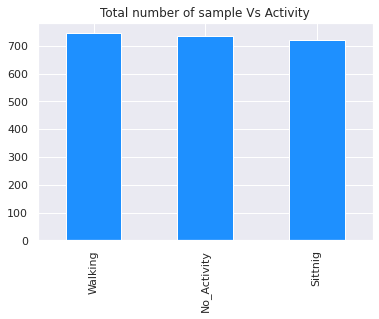

In [3]:
sns.set(color_codes=True)
df['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


## Analysis of Walking activity

In [4]:
w_amp=df.iloc[:745,1:53].values
Walking_ts=df.iloc[:745,0]
# w_amp

(745, 3)
(745,)


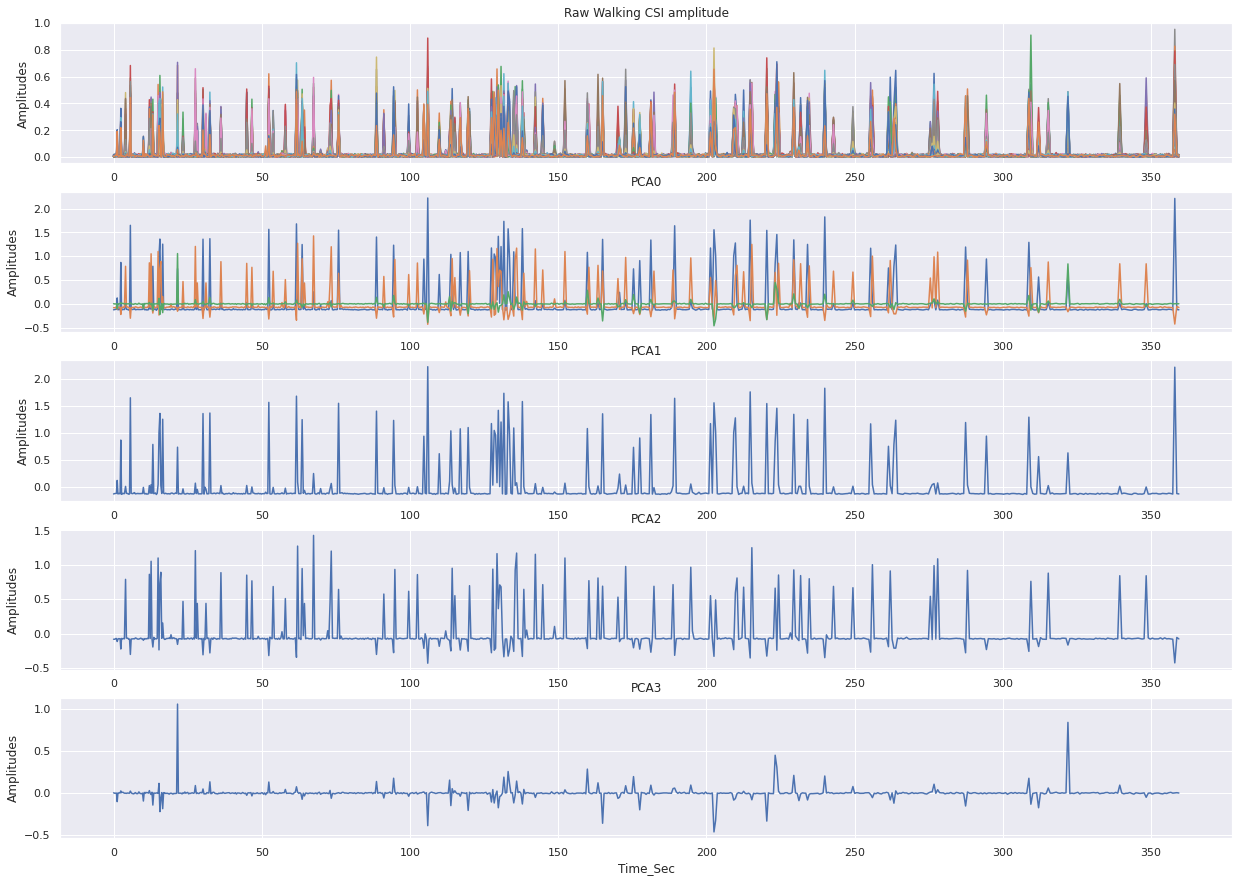

In [5]:
pca = decomposition.PCA(n_components=3)
walking_pca = pca.fit_transform(w_amp)

print(walking_pca.shape)
print(walking_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(Walking_ts,w_amp)
plt.title("Raw Walking CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(Walking_ts,walking_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(Walking_ts, walking_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(Walking_ts, walking_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(Walking_ts, walking_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
fig.savefig("Walking_PCA_mag.png")

## Analysis of Sitting activity

In [6]:
Sitting_amp=df.iloc[745:1466,1:53].values
Sitting_ts=df.iloc[745:1466,0]
# Sitting_amp

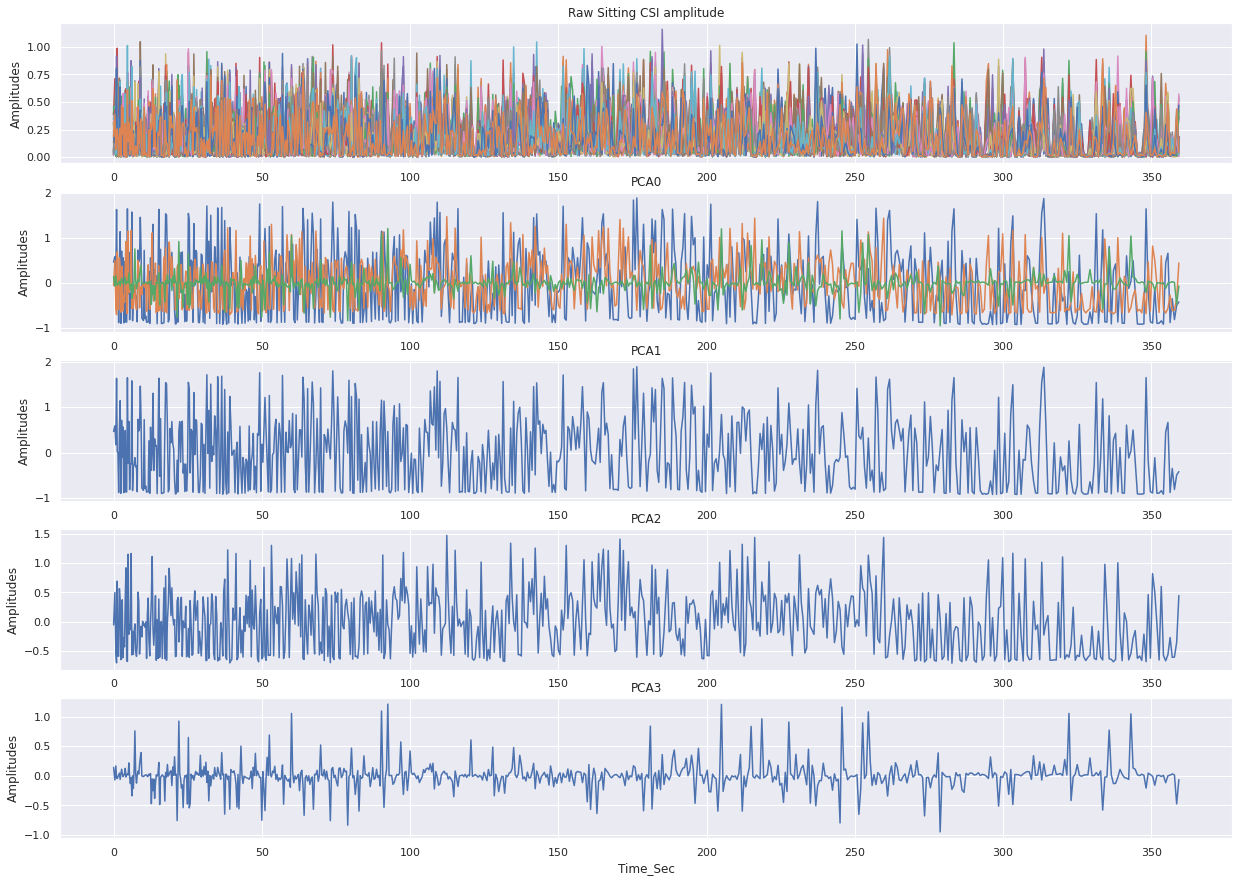

In [7]:
Sitting_pca = pca.fit_transform(Sitting_amp)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(Sitting_ts,Sitting_amp)
plt.title("Raw Sitting CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(Sitting_ts,Sitting_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(Sitting_ts, Sitting_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(Sitting_ts, Sitting_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(Sitting_ts, Sitting_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
fig.savefig("Sitting_PCA_mag.png")

## Analysis of No_Person activity

In [8]:
NP_amp=df.iloc[1466:,1:53].values
NP_ts=df.iloc[1466:,0]
# NP_amp

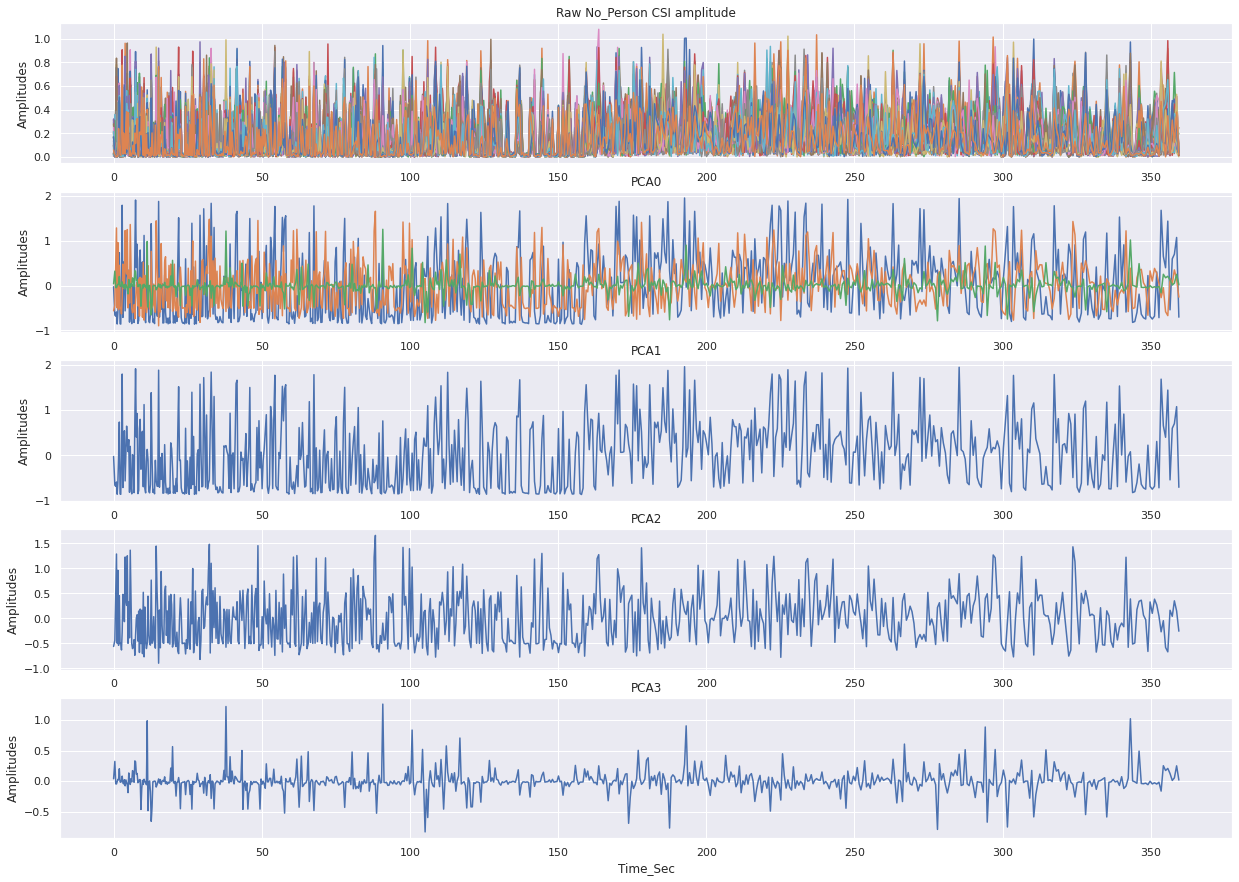

In [9]:
NP_pca = pca.fit_transform(NP_amp)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(NP_ts,NP_amp)
plt.title("Raw No_Person CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(NP_ts,NP_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(NP_ts, NP_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(NP_ts, NP_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(NP_ts, NP_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
fig.savefig("NP_PCA_mag.png")

## Analysis of All activity

In [10]:
dataset_amp=df.iloc[:,1:53].values
dataset_phs=df.iloc[:,53:-1].values

dataset_labels=df.iloc[:,-1]
Time_stamp=df.iloc[:,0]
# dataset_amp
# dataset_phs
# dataset_labels
# Time_stamp

Text(0, 0.5, 'Amplitudes')

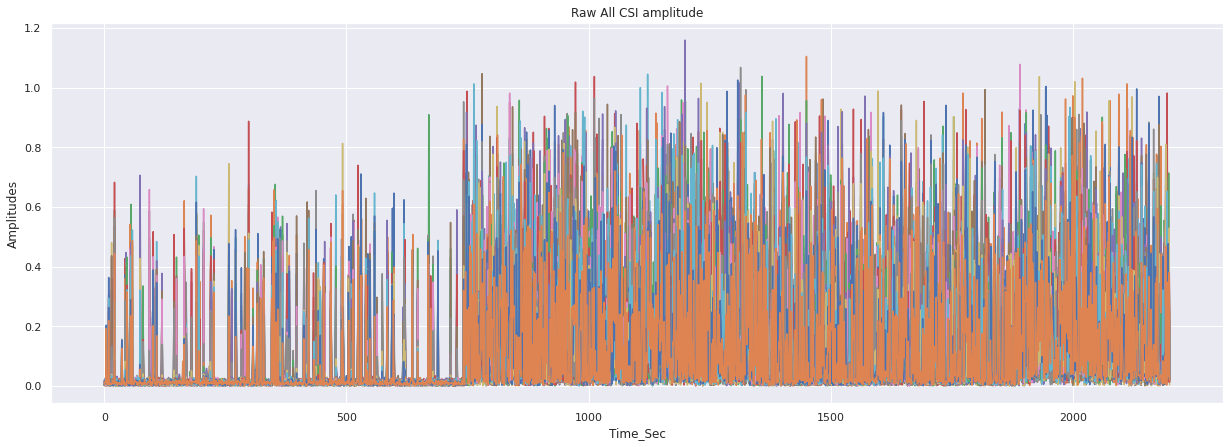

In [11]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_amp)
plt.title("Raw All CSI amplitude")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')


Text(0.5, 1.0, 'Raw All CSI amplitude Spectrogram')

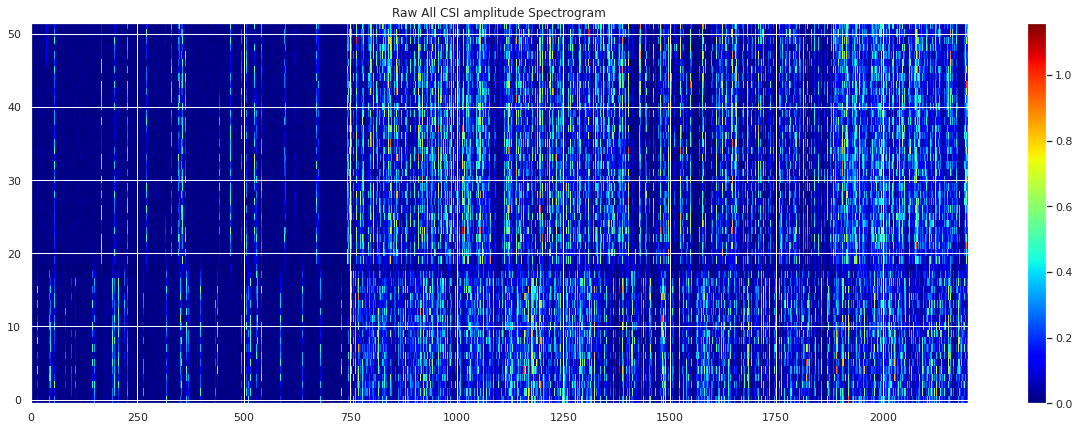

In [12]:
fig = plt.figure(figsize = (21, 7))
im = plt.imshow((dataset_amp).T,interpolation = "nearest", aspect = "auto", cmap="jet", origin='lower')
plt.colorbar()
plt.title("Raw All CSI amplitude Spectrogram")

Text(0, 0.5, 'Amplitudes')

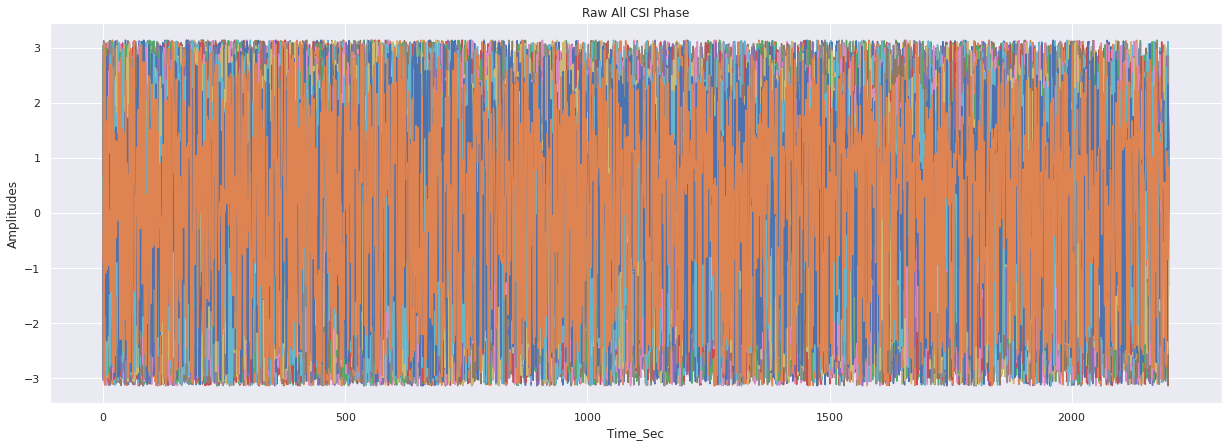

In [13]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_phs)
plt.title("Raw All CSI Phase")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')

Text(0.5, 1.0, 'Raw All CSI amplitude Spectrogram')

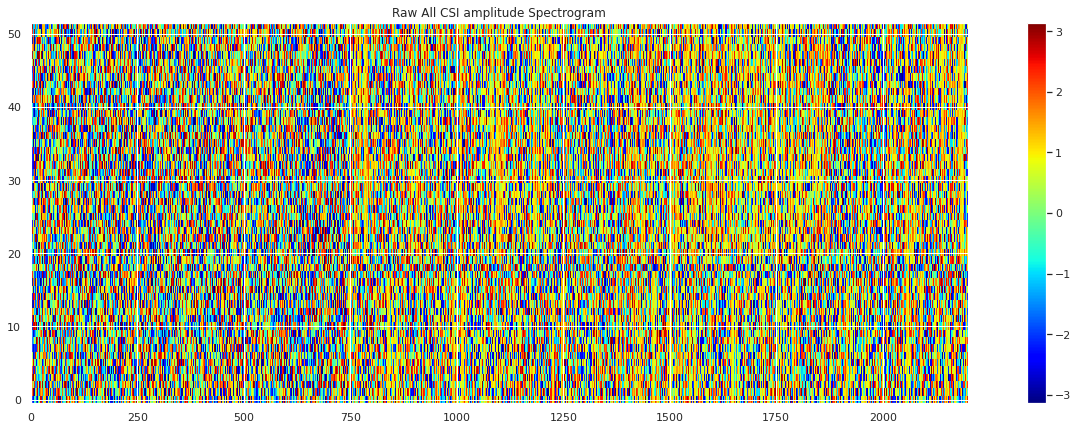

In [14]:
fig = plt.figure(figsize = (21, 7))
im = plt.imshow((dataset_phs).T,interpolation = "nearest", aspect = "auto", cmap="jet", origin='lower')
plt.colorbar()
plt.title("Raw All CSI amplitude Spectrogram")

# PCA

## Amplitude Noise reduction using PCA

(2201, 3)
(2201,)


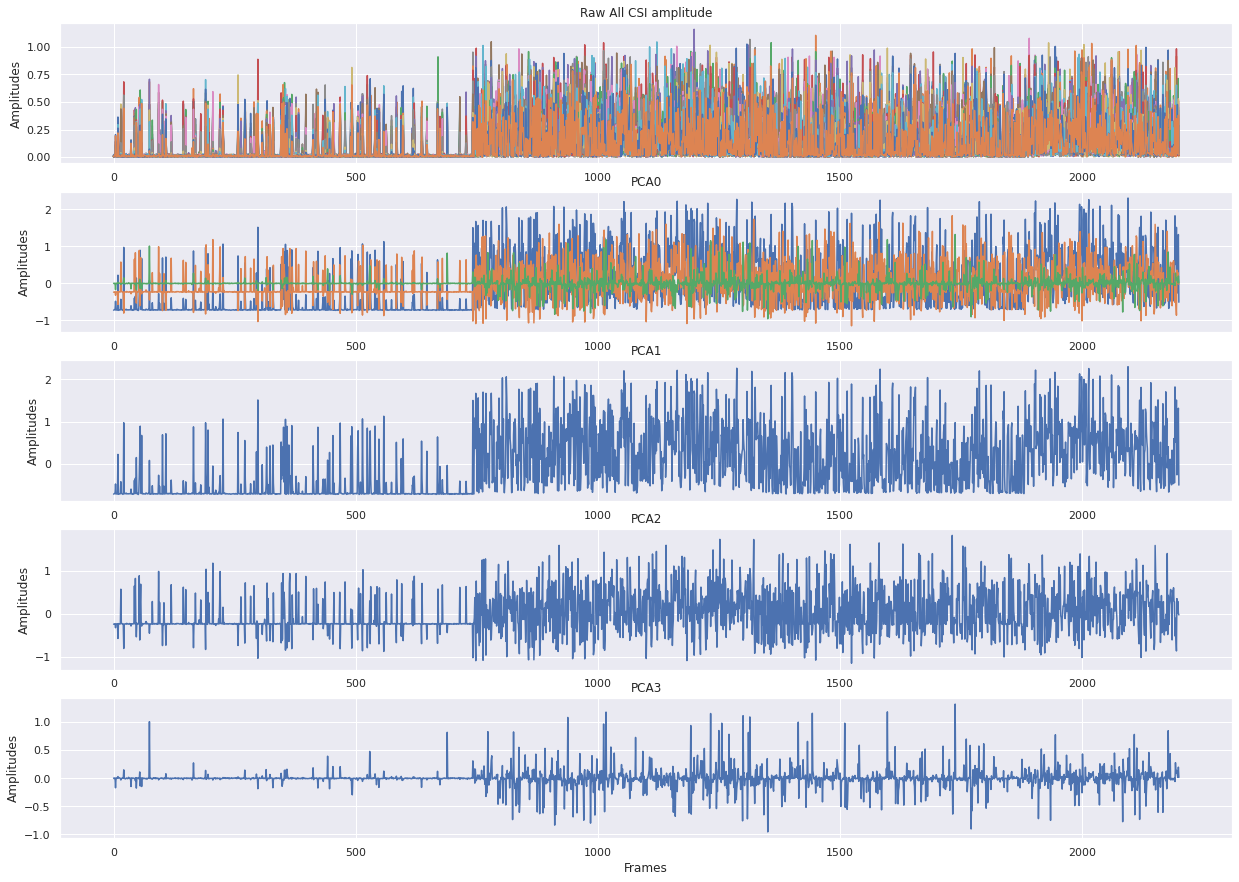

In [15]:

pca = decomposition.PCA(n_components=3)
amp_pca = pca.fit_transform(dataset_amp)

print(amp_pca.shape)
print(amp_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(dataset_amp)
plt.title("Raw All CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(amp_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(amp_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(amp_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(amp_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')
fig.savefig("All_PCA_mag.png")


## Phase Noise reduction using PCA

(2201, 3)
(2201,)


Text(0, 0.5, 'Amplitudes')

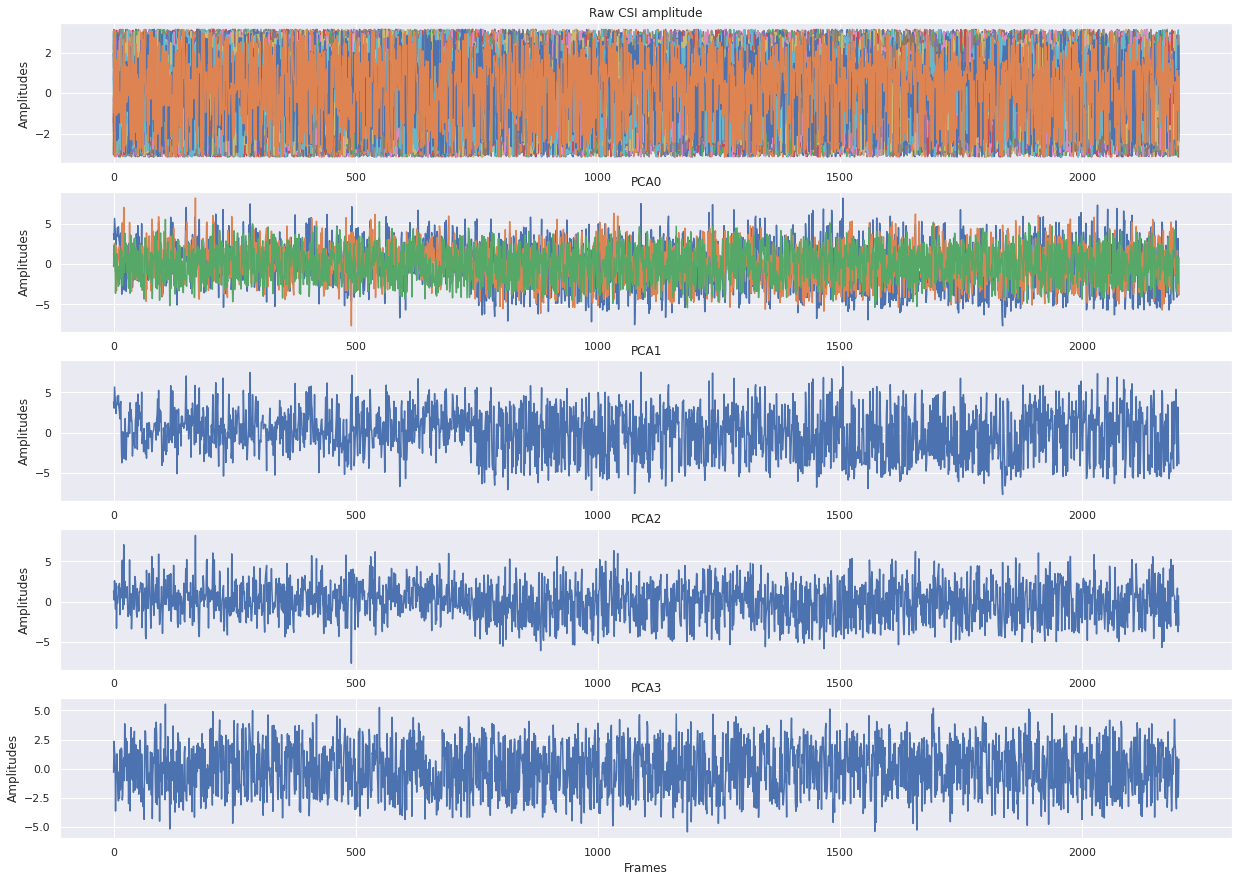

In [16]:


pca = decomposition.PCA(n_components=3)
phase_pca = pca.fit_transform(dataset_phs)

print(phase_pca.shape)
print(phase_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(dataset_phs)
plt.title("Raw CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(phase_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(phase_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(phase_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(phase_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')

In [17]:
amp_df=pd.DataFrame(amp_pca.T[0], columns=["PC1_amp"])
amp_df

PC1_amp
0    -0.723190
1    -0.715935
2    -0.711068
3    -0.709781
4    -0.482959
...        ...
2196 -0.265868
2197  0.825568
2198  0.998762
2199  1.316721
2200 -0.509440

[2201 rows x 1 columns]

In [18]:
phs_df=pd.DataFrame(phase_pca.T[0], columns=["PC1_phs"])
phs_df

PC1_phs
0     3.775720
1     3.048733
2     5.668853
3     4.557965
4     3.577157
...        ...
2196 -4.084985
2197  0.500900
2198  3.181190
2199 -0.045632
2200 -3.832091

[2201 rows x 1 columns]

In [19]:
amp_phs_df = pd.concat([amp_df, phs_df, df[['Activity']]], axis = 1)
amp_phs_df

PC1_amp   PC1_phs     Activity
0    -0.723190  3.775720      Walking
1    -0.715935  3.048733      Walking
2    -0.711068  5.668853      Walking
3    -0.709781  4.557965      Walking
4    -0.482959  3.577157      Walking
...        ...       ...          ...
2196 -0.265868 -4.084985  No_Activity
2197  0.825568  0.500900  No_Activity
2198  0.998762  3.181190  No_Activity
2199  1.316721 -0.045632  No_Activity
2200 -0.509440 -3.832091  No_Activity

[2201 rows x 3 columns]

In [20]:
amp_phs_df.to_csv("/home/ranjit/python_uhd_install/Dataset_Preparation/PCA_amp_phs.csv")

# DWT for Noise reduction and features extraction

## Required function

In [21]:
def madev(d,axis=None): # Mean absolute deviation of a signal
    return np.mean(np.absolute(d-np.mean(d,axis)),axis)


def wavelet_denoising(x, wavelet='db4', level=6):                                   
    coeff = pywt.wavedec(x, wavelet, mode="symmetric") #symmetric, per, zero, constant, reflect, smooth,
#     print(np.array(coeff)[0].shape)
    sigma = (1/0.6745) * madev(coeff[0][1])
    
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='soft') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='symmetric')



'''
def DWT_noise(vals, th=10):
    threshold = th # Threshold for filtering

    data = vals.copy() 
    # print("data: ", data.shape)

    w = pywt.Wavelet('sym5')
    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)
    # print("maximum level is " + str(maxlev))
    
    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'sym5', level=maxlev)
    
    
    #plt.figure()
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    datarec = pywt.waverec(coeffs, 'sym5')
    return datarec

'''


'\ndef DWT_noise(vals, th=10):\n    threshold = th # Threshold for filtering\n\n    data = vals.copy() \n    # print("data: ", data.shape)\n\n    w = pywt.Wavelet(\'sym5\')\n    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)\n    # print("maximum level is " + str(maxlev))\n    \n    # Decompose into wavelet components, to the level selected:\n    coeffs = pywt.wavedec(data, \'sym5\', level=maxlev)\n    \n    \n    #plt.figure()\n    for i in range(1, len(coeffs)):\n        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))\n    datarec = pywt.waverec(coeffs, \'sym5\')\n    return datarec\n\n'

Text(0.5, 1.0, 'DWT Noise removal')

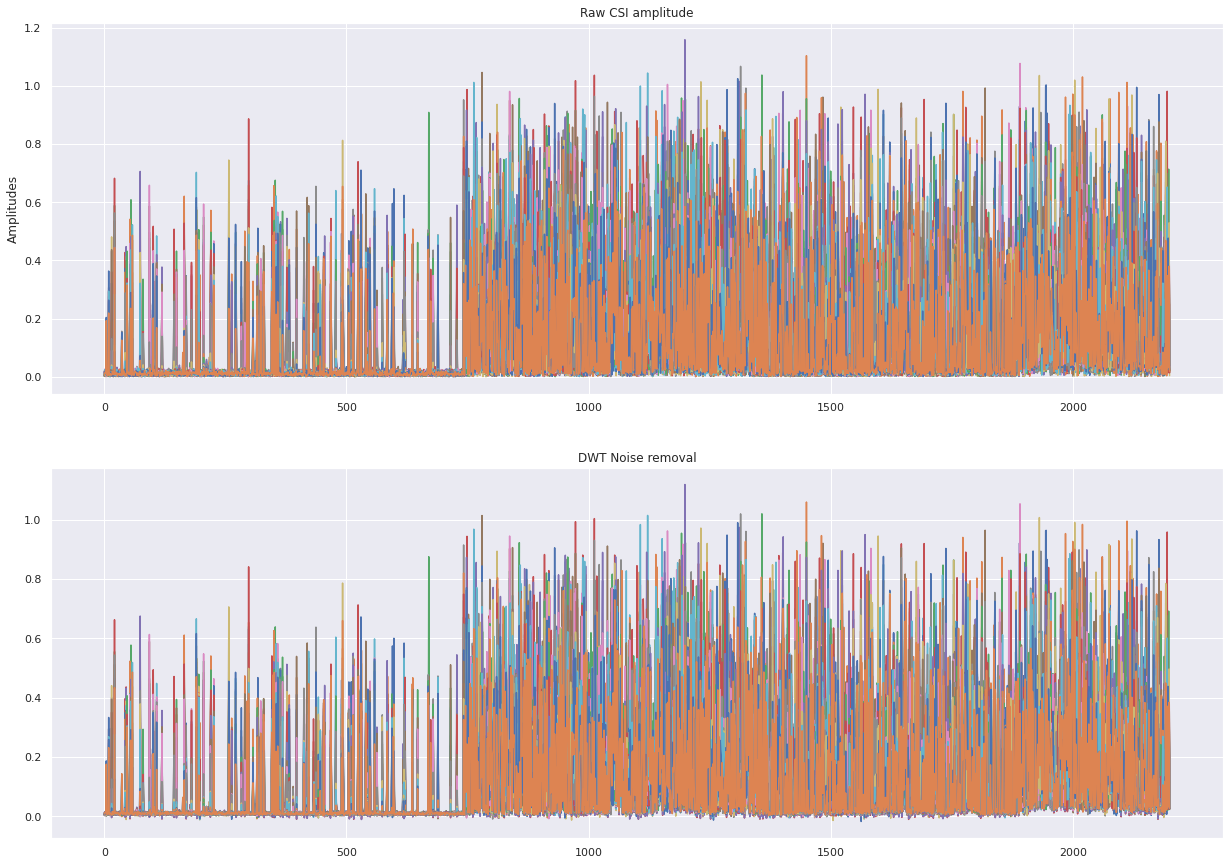

In [22]:
fig = plt.figure(figsize = (21, 15))

ax = plt.subplot(211)
plt.plot(dataset_amp)
plt.title("Raw CSI amplitude")
plt.ylabel('Amplitudes')

ax = plt.subplot(212)
amp1_with_dwt = wavelet_denoising(dataset_amp)
plt.plot(amp1_with_dwt)
plt.title("DWT Noise removal")

## Dimensionality Reduction using PCA

### Mathematically the main objective of PCA is to:
1. Find an orthonormal basis for the data.
2. Sort dimensions in the order of importance.
3. Discard the low significance dimensions.
4. Focus on uncorrelated and Gaussian components.

### Steps involved in PCA
1. Standardize the PCA.
2. Calculate the covariance matrix.
3. Find the eigenvalues and eigenvectors for the covariance matrix.
4. Plot the vectors on the scaled data.

## Amplitude Dimensionality Reduction using PCA

##  1. Standardizing the features

In [23]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_features_amp = StandardScaler().fit_transform(amp_pca)


In [24]:
# fig = plt.figure(figsize = (21, 7))
# plt.plot(x)

## 2. Create a covariance matrix:

In [25]:
cov_data_amp = np.corrcoef(std_features_amp.T)
# cov_data

### Plot the covariance matrix to identify the correlation between features using a heatmap

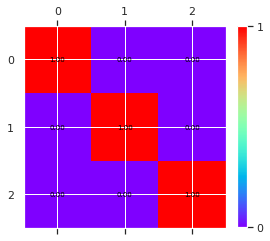

In [26]:
img = plt.matshow(cov_data_amp, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data_amp.shape[0]):
    for y in range(cov_data_amp.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data_amp[x,y], size=7, color='black', ha="center", va="center")
        

plt.show()

# PCA Projection to 2D

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_amp = pca.fit_transform(std_features_amp)
principalDf_amp = pd.DataFrame(data = principalComponents_amp
             , columns = ['PC_amp1', 'PC_amp2'])

principalDf_amp

PC_amp1   PC_amp2
0    -0.943585  0.007104
1    -0.934119 -0.031462
2    -0.927769  0.013682
3    -0.926090 -0.012379
4    -0.630143 -0.941666
...        ...       ...
2196 -0.346892  0.714190
2197  1.077163  0.295373
2198  1.303139  0.078368
2199  1.717997  1.088558
2200 -0.664694  0.079047

[2201 rows x 2 columns]

## Phase Dimensionality Reduction using PCA

In [28]:
std_features_phs = StandardScaler().fit_transform(phase_pca)

# PCA Projection to 2D
principalComponents_phs = pca.fit_transform(std_features_phs)
principalDf_phs = pd.DataFrame(data = principalComponents_phs
             , columns = ['PC_phs1', 'PC_phs2'])

principalDf_phs

PC_phs1   PC_phs2
0     0.485062  0.288219
1    -0.704539  0.832988
2     0.284759  1.265576
3    -0.171692  0.568182
4     0.899591 -1.470580
...        ...       ...
2196 -0.462438  0.200729
2197  0.374387  0.622912
2198 -0.322873 -1.916765
2199  0.935666 -0.520036
2200 -1.155235 -0.604880

[2201 rows x 2 columns]

In [29]:
finalDf = pd.concat([principalDf_amp, principalDf_phs, df[['Activity']]], axis = 1)
finalDf

PC_amp1   PC_amp2   PC_phs1   PC_phs2     Activity
0    -0.943585  0.007104  0.485062  0.288219      Walking
1    -0.934119 -0.031462 -0.704539  0.832988      Walking
2    -0.927769  0.013682  0.284759  1.265576      Walking
3    -0.926090 -0.012379 -0.171692  0.568182      Walking
4    -0.630143 -0.941666  0.899591 -1.470580      Walking
...        ...       ...       ...       ...          ...
2196 -0.346892  0.714190 -0.462438  0.200729  No_Activity
2197  1.077163  0.295373  0.374387  0.622912  No_Activity
2198  1.303139  0.078368 -0.322873 -1.916765  No_Activity
2199  1.717997  1.088558  0.935666 -0.520036  No_Activity
2200 -0.664694  0.079047 -1.155235 -0.604880  No_Activity

[2201 rows x 5 columns]

In [30]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('PC1', fontsize = 15)
# ax.set_ylabel('PC2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# Activity = ['Sitting', 'Walking', 'No_Person']
# colors = ['r', 'g', 'b']
# for Activity, color in zip(Activity,colors):
#     indicesToKeep = finalDf['Activity'] == Activity
#     ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
#                , finalDf.loc[indicesToKeep, 'PC2']
#                , c = color
#                , s = 50)
# ax.legend(Activity)
# ax.grid()

# Visualize all activity

In [31]:
# def plot_activity(Activity, dataset):
#     label=[]

#     data = df[df['Activity'] == Activity][["S0","S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9"]][:100]
#     axis = data.plot(subplots=True, figsize=(16, 12), title=Activity)
    
#     for ax in axis:
#         ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

In [32]:
# plot_activity("Walking", df)

In [33]:
# plot_activity("Sitting", df)

In [34]:
# plot_activity("No_Person", df)

In [35]:
# plot_activity("Falling", df)

# Data Preprocessing

In [36]:
from scipy import stats

num_time_steps = 1
num_features=2
step = 1
segments = []
labels = []
for i in range(0, len(df) - num_time_steps, step):
    S0 = amp_phs_df['PC1_amp'].values[i: i + num_time_steps]
    S1 = amp_phs_df['PC1_phs'].values[i: i + num_time_steps]
#     S2 = finalDf['PC_phs1'].values[i: i + num_time_steps]
#     S3 = finalDf['PC_phs2'].values[i: i + num_time_steps]
    
    
#     S4 = df['S4'].values[i: i + num_time_steps]
#     S5 = df['S5'].values[i: i + num_time_steps]
#     S6 = df['S6'].values[i: i + num_time_steps]
#     S7 = df['S7'].values[i: i + num_time_steps]
#     S8 = df['S8'].values[i: i + num_time_steps]
#     S9 = df['S9'].values[i: i + num_time_steps]
    
    
    
    label = stats.mode(df['Activity'][i: i + num_time_steps])[0][0]
#     segments.append([S0,S1,S2,S3,S4,S5,S6,S7,S8,S9])
    segments.append([S0,S1])

    
    labels.append(label)

In [37]:
np.array(segments).shape

(2200, 2, 1)

# Transfering shape of segment

In [38]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, num_time_steps, num_features)


# One-Hot encoding on label (Walking, Sitting, ....)

In [39]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

reshaped_segments.shape

(2200, 1, 2)

In [40]:
# labels[0]

# K- fold cross Validation

In [41]:
# from sklearn.model_selection import cross_val_score
# a=cross_val_score(classifier,X_train, Y_train,cv=10,scoring='accuracy')
# # Score of K-fold cross validation
# a.mean()

# Split the dataset into training (70%) and testing (30%)

In [42]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)



In [43]:
len(X_train)

1540

In [44]:
len(X_test)

660

# Building the model -- LSTM
Our model contains 2 fully-connected and 2 LSTM layers (stacked on each other) with 64 units each:

In [45]:
num_classes = 3
num_hidden_layer = 64

In [46]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf1.Variable(tf.random_normal([num_features, num_hidden_layer])),
        'output': tf1.Variable(tf.random_normal([num_hidden_layer, num_classes]))
    }
    biases = {
        'hidden': tf1.Variable(tf.random_normal([num_hidden_layer], mean=1.0)),
        'output': tf1.Variable(tf.random_normal([num_classes]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, num_features])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, num_time_steps, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.compat.v1.nn.rnn_cell.LSTMCell(num_hidden_layer, forget_bias=1.0) for _ in range(2)]
    
    lstm_layers = tf.keras.layers.StackedRNNCells(lstm_layers)


    outputs, _ = tf.compat.v1.nn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']


# Creating Placeholders:

In [47]:
tf.compat.v1.reset_default_graph() # To clear default graph

X = tf.placeholder(tf.float32, [None, num_time_steps, num_features], name="input") # X values that must be feed using feed dict
Y = tf.placeholder(tf.float32, [None, num_classes]) # Y values that must be feed using feed dict

In [48]:
pred_Y = create_LSTM_model(X)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [49]:
L2_LOSS = 0.00015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [50]:
LEARNING_RATE = 0.00015

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

# Training

In [51]:
num_epochs=50
BATCH_SIZE = 1024

In [52]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, num_epochs + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 5 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test*100}% loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()

print(f'final results: accuracy: {acc_final*100}% loss: {loss_final}')


2022-03-03 12:28:20.470576: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-03 12:28:20.475210: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib
2022-03-03 12:28:20.476552: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-03 12:28:20.476644: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP): /proc/driver/nvidia/version does not exist


epoch: 1 test accuracy: 52.42424011230469% loss: 1.1857011318206787
epoch: 5 test accuracy: 59.39394235610962% loss: 1.1531424522399902
epoch: 10 test accuracy: 57.575756311416626% loss: 1.1188541650772095
epoch: 15 test accuracy: 55.75757622718811% loss: 1.0905234813690186
epoch: 20 test accuracy: 55.15151619911194% loss: 1.0660185813903809
epoch: 25 test accuracy: 58.33333134651184% loss: 1.0426545143127441
epoch: 30 test accuracy: 59.54545736312866% loss: 1.0180155038833618
epoch: 35 test accuracy: 60.151517391204834% loss: 0.9909469485282898
epoch: 40 test accuracy: 61.06060743331909% loss: 0.9618650078773499
epoch: 45 test accuracy: 61.06060743331909% loss: 0.9321214556694031
epoch: 50 test accuracy: 60.45454740524292% loss: 0.9032649993896484

final results: accuracy: 60.45454740524292% loss: 0.9032649993896484


In [53]:
import pickle  # implements binary protocols for serializing and de-serializing a Python object structure

history = pickle.load(open("history.p", "rb"))
# predictions = pickle.load(open("predictions.p", "rb"))


# Evaluation

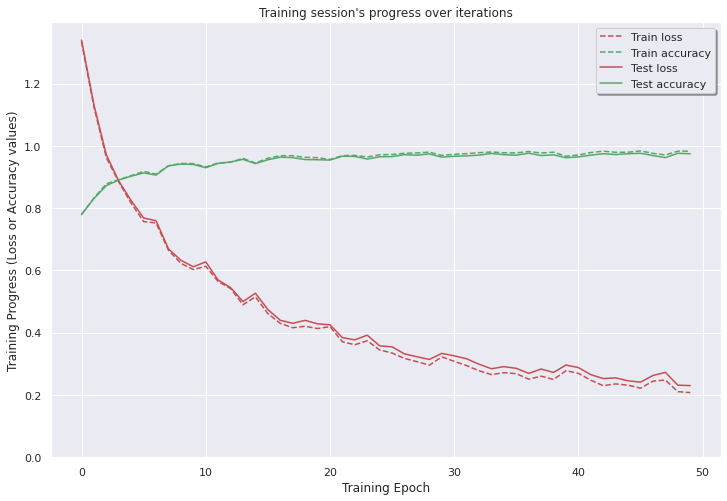

In [54]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

In [55]:
LABELS = ['Walking','Sitting','No_Person']

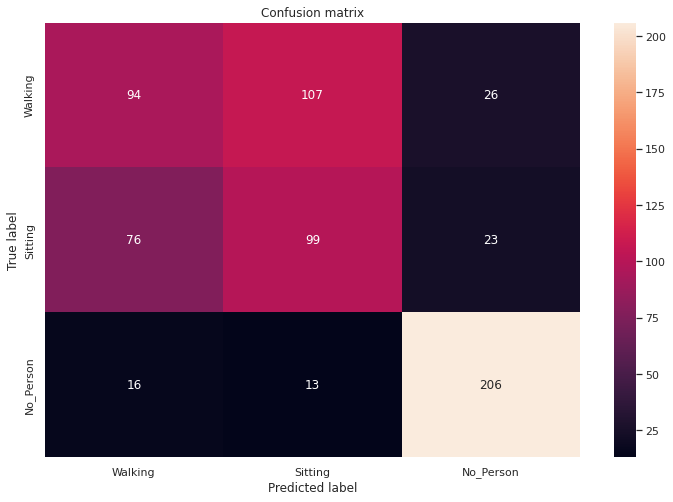

In [56]:
from sklearn.metrics import confusion_matrix

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

confusion_matrix = confusion_matrix(max_test, max_predictions)


plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

## Precision, Recall and F1 score

In [57]:
from sklearn.metrics import precision_score , recall_score, f1_score

# Precision Score
# precision_score(y_test, predictions)

# print(np.shape(predictions))
# print(np.shape(y_test))
# print(predictions.size)

# print(np.concatenate((predictions.reshape((predictions.size),1),y_test.reshape((y_test.size),1)),1))

# precision_score(np.concatenate((predictions.reshape((predictions.size),1),y_test.reshape((y_test.size),1)),1))




In [58]:
# from sklearn.metrics import precision_recall_curve
# # For thershold value
# y_score=cross_val_predict(classifier,X_train, Y_train,cv=3, method="decision_function")